### Dimension Reduction Task01
- 기대 수명 데이터세트를 회귀 분석하되, 차원을 축소하여 진행해본다.

In [1]:
import pandas as pd
import numpy as np

l_df = pd.read_csv('./datasets/life_expectancy.csv')
l_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [2]:
# 결측치 확인
l_df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [3]:
# 데이터 세트 정보 출력
l_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
# 상태(Status)의 value counst 출력
l_df.Status.value_counts()

Status
Developing    2426
Developed      512
Name: count, dtype: int64

#### 불필요한 컬럼
- object형(Country, Status)
- 연도(Year)
- 의미 중첩(percentage expenditure, Total expenditure 중 하나 / thinness  1-19 years, thinness 5-9 years 중 하나)

---
#### 결측치 삭제할 컬럼 (전체 데이터의 10% 미만)
- Life expectancy, Adult Mortality, Alcohol, BMI, Polio, Total expenditure, Diphtheria,  
  thinness  1-19 years, thinness 5-9 years, Income composition of resources, Schooling

In [5]:
# 불필요한 데이터 삭제한 새로운 데이터 세트(전처리용) 생성
pre_l_df = l_df.drop(labels=['Country', 'Year', 'Status'], axis=1)
pre_l_df

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 현재 데이터 세트에서 feature와 타겟 데이터와의 상관관계 출력
pre_l_df.corr()['Life expectancy '].sort_values(ascending=False)[1:]

Schooling                          0.751975
Income composition of resources    0.724776
 BMI                               0.567694
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Total expenditure                  0.218086
Population                        -0.021538
Measles                           -0.157586
infant deaths                     -0.196557
under-five deaths                 -0.222529
 thinness 5-9 years               -0.471584
 thinness  1-19 years             -0.477183
 HIV/AIDS                         -0.556556
Adult Mortality                   -0.696359
Name: Life expectancy , dtype: float64

#### 불필요한 컬럼
- 의미 중첩되는 컬럼 중 target과의 상관관계가 낮은 컬럼
> - Total expenditure, thinness 5-9 years
- 인구(Population)
---
#### 결측치 삭제할 컬럼 (전체 데이터의 10% 미만)
- Life expectancy, Adult Mortality, Alcohol, BMI, Polio, Diphtheria,  
  thinness  1-19 years, Income composition of resources, Schooling

In [7]:
# 불필요한 컬럼 삭제
pre_l_df = pre_l_df.drop(labels=['Total expenditure', ' thinness 5-9 years', 'Population'], axis=1)
pre_l_df

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,65.0,0.1,584.259210,17.2,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,62.0,0.1,612.696514,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,64.0,0.1,631.744976,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,67.0,0.1,669.959000,17.9,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,68.0,0.1,63.537231,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,65.0,33.6,454.366654,9.4,0.407,9.2
2934,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,68.0,36.7,453.351155,9.8,0.418,9.5
2935,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,71.0,39.8,57.348340,1.2,0.427,10.0
2936,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,75.0,42.1,548.587312,1.6,0.427,9.8


In [8]:
# 결측치 삭제할 컬럼들
columns = ['Life expectancy ', 'Adult Mortality', 'Alcohol', ' BMI ', 'Polio', 'Diphtheria ',
          ' thinness  1-19 years', 'Income composition of resources', 'Schooling']

# 반복문으로 결측치 삭제
for column in columns:
    pre_l_df = pre_l_df[~pre_l_df[column].isna()]

# 결측치 제거 후의 데이터 세트 확인
pre_l_df

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,65.0,0.1,584.259210,17.2,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,62.0,0.1,612.696514,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,64.0,0.1,631.744976,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,67.0,0.1,669.959000,17.9,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,68.0,0.1,63.537231,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,65.0,33.6,454.366654,9.4,0.407,9.2
2934,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,68.0,36.7,453.351155,9.8,0.418,9.5
2935,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,71.0,39.8,57.348340,1.2,0.427,10.0
2936,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,75.0,42.1,548.587312,1.6,0.427,9.8


In [9]:
# 결측치 재확인
pre_l_df.isna().sum()

Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        474
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                0
Diphtheria                           0
 HIV/AIDS                            0
GDP                                258
 thinness  1-19 years                0
Income composition of resources      0
Schooling                            0
dtype: int64

#### 결측치 대체할 컬럼들 (전체 데이터의 10% 이상)
- Hepatitis B, GDP
> - 사분위수, 평균, 중간값 출력 및 데이터 분포 시각화 후 결정

In [10]:
# 위 컬럼들의 수치 데이터 출력
pre_l_df[['Hepatitis B', 'GDP']].describe().T

,count,mean,std,min,25%,50%,75%,max
Hepatitis B,2088.0,80.903736,24.956422,2.00000,77.000000,92.000000,97.000000,99.0000
GDP,2304.0,7617.916013,14535.338226,1.68135,454.891745,1759.357808,5945.671748,119172.7418


array([[<Axes: title={'center': 'Hepatitis B'}>,
        <Axes: title={'center': 'GDP'}>]], dtype=object)

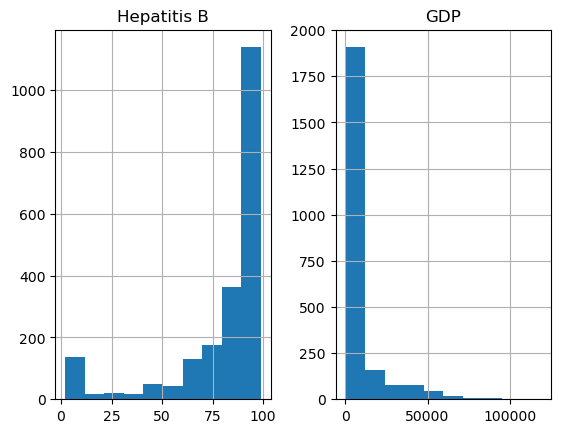

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 분포 시각화
pre_l_df[['Hepatitis B', 'GDP']].hist()

#### 중간 분석
- 현재 데이터 분포가 한 쪽으로 치우쳐있음
- 이에 따라 평균과 중간값 차이가 발생함에 따라, 중간 값으로 결측치 보정

In [12]:
# 중간값으로 결측치 보정
columns = ['Hepatitis B', 'GDP']

for column in columns:
    pre_l_df[column] = pre_l_df[column].fillna(pre_l_df[column].median())

# 결측치 여부 재확인
pre_l_df.isna().sum()

Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
 thinness  1-19 years              0
Income composition of resources    0
Schooling                          0
dtype: int64

In [13]:
# 위 컬럼들의 수치 데이터 재출력
pre_l_df[['Hepatitis B', 'GDP']].describe().T

,count,mean,std,min,25%,50%,75%,max
Hepatitis B,2562.0,82.956674,22.937330,2.00000,82.00000,92.000000,96.000000,99.0000
GDP,2562.0,7027.944110,13896.087147,1.68135,519.83963,1759.357808,5293.288957,119172.7418


array([[<Axes: title={'center': 'Hepatitis B'}>,
        <Axes: title={'center': 'GDP'}>]], dtype=object)

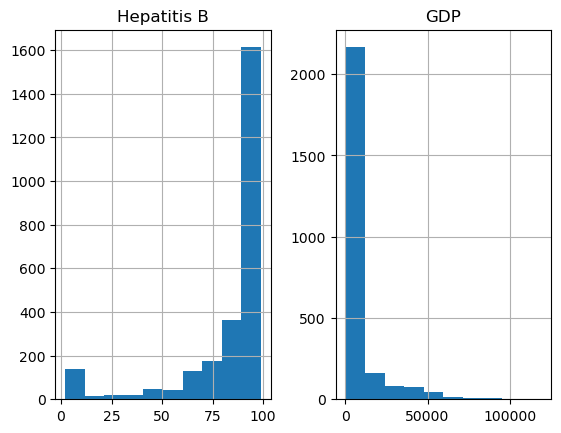

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 분포 시각화
pre_l_df[['Hepatitis B', 'GDP']].hist()

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 현재 데이터 세트에서 feature와 타겟 데이터와의 상관관계 출력
pre_l_df.corr()['Life expectancy '].sort_values(ascending=False)[1:]

Schooling                          0.757073
Income composition of resources    0.718515
 BMI                               0.565927
Diphtheria                         0.461277
Polio                              0.451114
GDP                                0.449214
percentage expenditure             0.412913
Alcohol                            0.380365
Hepatitis B                        0.150583
Measles                           -0.146826
infant deaths                     -0.178629
under-five deaths                 -0.203618
 thinness  1-19 years             -0.464073
 HIV/AIDS                         -0.571598
Adult Mortality                   -0.678233
Name: Life expectancy , dtype: float64

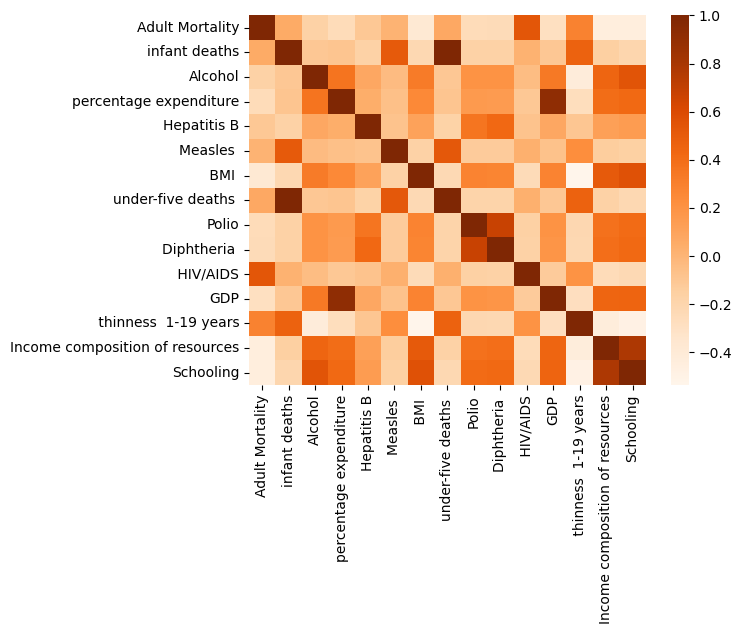

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# target간 상관관계를 히트맵으로 시각화
sns.heatmap(pre_l_df.iloc[:, 1:].corr(), cmap='Oranges')
plt.show()

In [17]:
# feature간 상관관계를 데이터 세트 형태로 출력
pre_l_df.iloc[:, 1:].corr()

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,Income composition of resources,Schooling
Adult Mortality,1.000000,0.060024,-0.169388,-0.254045,-0.109016,0.010057,-0.377252,0.074255,-0.252889,-0.246830,0.535768,-0.285558,0.290571,-0.444191,-0.444687
infant deaths,0.060024,1.000000,-0.104095,-0.086695,-0.168150,0.511341,-0.220607,0.996752,-0.165088,-0.165676,0.017756,-0.101024,0.462258,-0.147036,-0.204352
Alcohol,-0.169388,-0.104095,1.000000,0.364627,0.079296,-0.032882,0.326990,-0.099433,0.201363,0.201363,-0.040778,0.339440,-0.418698,0.446423,0.546310
percentage expenditure,-0.254045,-0.086695,0.364627,1.000000,0.044415,-0.058797,0.250382,-0.088761,0.157013,0.151142,-0.106745,0.921591,-0.270263,0.401966,0.419187
Hepatitis B,-0.109016,-0.168150,0.079296,0.044415,1.000000,-0.079527,0.107257,-0.170830,0.362463,0.425666,-0.078239,0.079823,-0.097546,0.122890,0.143036
Measles,0.010057,0.511341,-0.032882,-0.058797,-0.079527,1.000000,-0.170328,0.520741,-0.124540,-0.127012,0.031955,-0.070482,0.226451,-0.138397,-0.152969
BMI,-0.377252,-0.220607,0.326990,0.250382,0.107257,-0.170328,1.000000,-0.230375,0.285055,0.279699,-0.243702,0.282862,-0.536471,0.511925,0.567814
under-five deaths,0.074255,0.996752,-0.099433,-0.088761,-0.170830,0.520741,-0.230375,1.000000,-0.182549,-0.185717,0.029875,-0.104022,0.464303,-0.164970,-0.219783
Polio,-0.252889,-0.165088,0.201363,0.157013,0.362463,-0.124540,0.285055,-0.182549,1.000000,0.677344,-0.161942,0.196176,-0.214967,0.377713,0.415509
Diphtheria,-0.246830,-0.165676,0.201363,0.151142,0.425666,-0.127012,0.279699,-0.185717,0.677344,1.000000,-0.167561,0.185682,-0.222993,0.399322,0.422706


#### 중간 분석
- 현재 일부 feature들 간에 높은 상관관계가 발생
- 일단 제거 없이 진행해보고 차원 축소 후와의 결과 비교

### 차원 축소 없이 회귀 분석

#### 선형 회귀 모델로 분석

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 데이터 세트 분할 후 선형 회귀 모델로 훈련
features, targets = pre_l_df.iloc[:, :-1], pre_l_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [19]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

# 선형 회귀 모델의 평가 지표(R2 점수 포함)를 출력해주는 함수
def get_evaluation_regression(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [20]:
# 테스트 데이터 예측 후 평가
prediction = l_r.predict(X_test)

get_evaluation_regression(y_test, prediction)

MSE: 2.6048, RMSE: 1.6139, MSLE: 0.0470, RMSLE: 0.2167, R2: 0.7489


#### 1st Cycle - 선형 회귀 모델 분석 결과
- R2 Score는 약 0.75정도로, 나름 우수한 결과를 보여줌
- 하지만 다중 공선성 문제를 해결하지 않았기 때문에 신뢰도는 떨어짐

#### PCA 방식으로 차원 축소

In [21]:
from sklearn.model_selection import train_test_split

# 데이터 세트 분리
features, targets = pre_l_df.iloc[:, 1:], pre_l_df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

In [22]:
# 훈련 데이터와 테스트 데이터를 각각 병합하여 새로운 데이터 세트 생성
train_df = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
test_df = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

In [23]:
# 훈련용 / 테스트용 데이터 세트 확인
display(train_df)

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,Income composition of resources,Schooling,Life expectancy
0,85.0,0,12.40,5992.588029,86.0,9,52.7,0,86.0,86.0,0.1,38242.425200,1.7,0.848,14.9,79.4
1,82.0,0,1.78,6.491489,98.0,20,19.5,0,98.0,98.0,0.1,52.862285,14.3,0.632,11.9,75.4
2,161.0,1,10.39,508.630459,96.0,1,6.3,1,96.0,95.0,0.1,4513.136280,2.2,0.750,13.5,72.2
3,167.0,0,9.06,662.266369,91.0,0,41.1,0,91.0,91.0,0.1,6764.722867,3.9,0.000,15.1,71.7
4,238.0,6,2.86,186.101397,96.0,1,4.0,8,98.0,97.0,0.1,1453.917166,3.4,0.000,10.3,63.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,282.0,4,0.01,50.060535,87.0,1,25.6,6,87.0,87.0,3.4,642.625615,7.3,0.419,9.2,58.4
2045,92.0,0,12.40,3582.848308,44.0,0,5.6,0,83.0,84.0,0.1,24489.735530,1.7,0.837,15.5,78.6
2046,513.0,30,4.06,36.591149,92.0,568,17.9,48,54.0,53.0,1.7,249.939542,9.9,0.306,7.2,48.0
2047,161.0,6,6.12,49.092420,81.0,0,51.5,8,86.0,82.0,1.4,511.379370,3.4,0.692,12.8,73.3


In [24]:
display(test_df)

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,Income composition of resources,Schooling,Life expectancy
0,121.0,5,2.14,275.651493,93.0,164,5.6,6,96.0,93.0,0.1,7875.756953,2.8,0.745,11.9,72.2
1,13.0,0,5.38,595.730692,9.0,0,56.5,0,9.0,9.0,0.1,4383.595970,2.2,0.751,13.2,73.8
2,167.0,20,0.26,80.587884,9.0,3362,17.4,25,9.0,9.0,0.2,681.792587,16.3,0.538,12.3,68.9
3,18.0,0,3.15,0.000000,89.0,0,62.8,0,88.0,92.0,0.1,1759.357808,0.2,0.612,10.4,67.5
4,313.0,48,4.88,8.769989,92.0,253,14.2,89,94.0,82.0,2.3,46.998871,1.3,0.000,4.3,53.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,288.0,8,7.44,499.730412,94.0,13,47.3,9,94.0,93.0,0.1,6771.414797,2.4,0.754,14.7,65.3
509,131.0,7,3.99,344.741216,88.0,257,51.4,8,85.0,88.0,0.1,5223.351763,1.3,0.710,13.2,75.3
510,32.0,5,2.98,31.069326,92.0,1,21.3,7,76.0,74.0,5.7,481.694976,8.7,0.394,8.8,55.0
511,138.0,0,0.01,2146.945741,94.0,7,58.0,0,93.0,93.0,0.1,17454.843420,1.9,0.838,16.4,76.1


In [25]:
from sklearn.decomposition import PCA

# PCA 방식으로 데이터 세트 차원 축소
pca = PCA(n_components=2)

pca_train = pca.fit_transform(train_df.iloc[:, :-1])
pca_test = pca.fit_transform(test_df.iloc[:, :-1])

In [26]:
# 차원 축소 여부 확인
print(pca_train.shape, pca_test.shape)

(2049, 2) (513, 2)


In [27]:
# 훈련용 / 테스트용 데이터 세트를 차원 축소한 새로운 데이터 세트 생성
pca_columns = [f'pca{i + 1}' for i in range(pca_train.shape[1])]
pca_train_df = pd.DataFrame(pca_train, columns=pca_columns)
pca_train_df.loc[:, 'target'] = train_df['Life expectancy ']

pca_columns = [f'pca{i + 1}' for i in range(pca_test.shape[1])]
pca_test_df = pd.DataFrame(pca_test, columns=pca_columns)
pca_test_df.loc[:, 'target'] = test_df['Life expectancy ']

In [28]:
# 차원 축소된 데이터 세트 확인
display(pca_train_df)
display(pca_test_df)

,pca1,pca2,target
0,31587.603294,1974.946973,79.4
1,-6723.975900,-3120.850513,75.4
2,-2273.928932,-2547.028035,72.2
3,-42.020471,-2250.766744,71.7
4,-5321.820041,-2953.047626,63.5
...,...,...,...
2044,-6136.977785,-3061.743444,58.4
2045,17758.328208,122.176958,78.6
2046,-6600.036294,-2550.919250,48.0
2047,-6265.544887,-3079.851008,73.3


,pca1,pca2,target
0,1208.361994,-2065.870440,72.2
1,-2156.957271,-2612.914509,73.8
2,-6251.189541,304.430538,68.9
3,-4823.221787,-2917.159245,67.5
4,-6533.972592,-2856.168924,53.3
...,...,...,...
508,173.033371,-2335.250477,65.3
509,-1398.162726,-2268.487980,75.3
510,-6074.221611,-3058.225310,55.0
511,10914.124812,-1117.320681,76.1


In [29]:
# 기존 데이터에 대한 보존률 확인 - 거의 모든 데이터가 보존됨
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.63911855 0.35927859]
0.9983971370896858


#### 선형 회귀 모델로 분석

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pca_train_df.iloc[:, :-1], pca_train_df.iloc[:, -1]

# 데이터 세트 분할 후 선형 회귀 모델로 훈련
l_r = LinearRegression()
l_r.fit(features, targets)

LinearRegression()

In [31]:
X_test, y_test = pca_test_df.iloc[:, :-1], pca_test_df.iloc[:, -1]

# 테스트 데이터 예측 후 평가
prediction = l_r.predict(X_test)

get_evaluation_regression(y_test, prediction)

MSE: 62.6596, RMSE: 7.9158, MSLE: 0.0149, RMSLE: 0.1220, R2: 0.2496


#### 2nd Cycle - 선형 회귀 모델 분석 결과
- R2가 큰 폭으로 감소함
- 차원 축소 과정에서 분석에 중요한 feature 대다수가 삭제되었으며,  
  표준화를 진행하지 않았기 때문에 생긴 문제로 추정

### 3rd Cycle 진행 전
- 데이터 전처리부터 다시 진행

In [32]:
import pandas as pd
import numpy as np

l_df = pd.read_csv('./datasets/life_expectancy.csv')
l_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [33]:
# 불필요한 데이터 삭제한 새로운 데이터 세트(전처리용) 생성
pre_l_df = l_df.drop(labels=['Country', 'Year', 'Status'], axis=1)
pre_l_df

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [34]:
# 결측치 확인
pre_l_df.isna().sum()

Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [35]:
# 현재 데이터 세트에서 feature와 타겟 데이터와의 상관관계 출력
pre_l_df.corr()['Life expectancy '].sort_values(ascending=False)[1:]

Schooling                          0.751975
Income composition of resources    0.724776
 BMI                               0.567694
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Total expenditure                  0.218086
Population                        -0.021538
Measles                           -0.157586
infant deaths                     -0.196557
under-five deaths                 -0.222529
 thinness 5-9 years               -0.471584
 thinness  1-19 years             -0.477183
 HIV/AIDS                         -0.556556
Adult Mortality                   -0.696359
Name: Life expectancy , dtype: float64

In [36]:
# 결측치가 있는 컬럼들만 가져와서 파이썬 list 형태로 저장
columns = pre_l_df.columns[pre_l_df.isna().any()]

# 위 컬럼들의 결측치 제거
for column in columns:
    pre_l_df = pre_l_df[~pre_l_df[column].isna()]

# 결측치 확인
pre_l_df.isna().sum()

Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [37]:
# 인덱스 초기화
pre_l_df = pre_l_df.reset_index(drop=True)
pre_l_df

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
1645,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
1646,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
1647,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [38]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

# feature 데이터 표준화
result = std.fit_transform(pre_l_df.iloc[:, 1:])

std_pre_l_df = pd.DataFrame(result, columns=pre_l_df.iloc[:, 1:].columns)
std_pre_l_df

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0.756629,0.243745,-1.122948,-0.356909,-0.555446,-0.106171,-0.963560,0.238134,-3.455955,0.958840,-0.887941,-0.312389,-0.434239,0.270913,2.685909,2.663654,-0.833462,-0.722799
1,0.820490,0.260300,-1.122948,-0.355633,-0.672648,-0.171828,-0.988878,0.256557,-1.139051,0.967541,-1.027006,-0.312389,-0.431760,-0.203382,2.751157,2.706643,-0.849853,-0.758583
2,0.796542,0.276854,-1.122948,-0.355806,-0.594514,-0.177977,-1.014197,0.274979,-0.960828,0.945790,-0.934296,-0.312389,-0.430100,0.242452,2.794656,2.749632,-0.882634,-0.794367
3,0.828472,0.301687,-1.122948,-0.352983,-0.477312,0.055789,-1.039516,0.299541,-0.738049,1.115452,-0.795231,-0.312389,-0.426769,-0.155548,2.838155,2.814116,-0.920878,-0.830151
4,0.852420,0.318242,-1.122948,-0.393403,-0.438245,0.078203,-1.059771,0.324104,-0.693493,0.832682,-0.748876,-0.312389,-0.479628,-0.165747,2.903403,2.857105,-0.970049,-0.937503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,4.428626,-0.045965,-0.042998,-0.397439,-0.438245,-0.217549,-0.558461,-0.013633,-0.738049,0.510759,-0.887941,5.242678,-0.445561,-0.026635,0.989458,0.965586,-1.226833,-1.044856
1645,4.364766,-0.054242,-0.117478,-0.397439,-2.821346,-0.121643,-0.578715,-0.019774,-3.411399,0.245390,-0.748876,5.756729,-0.445650,-0.028673,1.076455,1.073058,-1.166735,-0.937503
1646,-0.760066,-0.062520,-0.025620,-0.397439,-0.242909,-0.190473,-0.598970,-0.025914,-0.470714,0.249740,-0.609811,6.270780,-0.480168,-0.206251,-0.793991,-0.775472,-1.117564,-0.758583
1647,4.133270,-0.062520,-0.698416,-0.397439,-0.125707,-0.168158,-0.619225,-0.032055,-0.337046,0.088779,-0.424391,6.652173,-0.437348,-0.032474,-0.706993,-0.689494,-1.117564,-0.830151


In [39]:
# 각 feature 별로 -1.96 ~ 1.96 범위를 벗어나는 데이터 제거
for column in std_pre_l_df.columns:
    std_pre_l_df = std_pre_l_df[std_pre_l_df[column].between(-1.96, 1.96)]

std_pre_l_df

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
16,-0.752083,-0.269455,0.016585,-0.189913,0.772839,-0.220624,1.006234,-0.271541,0.687738,0.019174,0.688128,-0.312389,-0.140494,-0.207623,-0.793991,-0.775472,0.712705,0.744348
17,-1.278935,-0.269455,-0.005759,-0.153650,0.733772,-0.220624,0.965724,-0.265401,0.643182,-0.033030,0.641774,-0.312389,-0.086317,-0.203931,-0.793991,-0.775472,0.707242,0.744348
18,-0.672257,-0.269455,0.056307,-0.152441,0.772839,-0.220624,0.930278,-0.265401,0.687738,-0.128736,0.688128,-0.312389,-0.100354,-0.203922,-0.772241,-0.753977,0.696315,0.744348
19,-0.656292,-0.269455,0.150648,-0.162922,0.772839,-0.219731,0.894832,-0.265401,0.687738,-0.159189,0.688128,-0.312389,-0.114921,-0.207991,-0.772241,-0.753977,0.658071,0.744348
20,-0.640327,-0.269455,0.207748,-0.148924,0.772839,-0.217847,0.859386,-0.265401,0.687738,-0.106985,0.688128,-0.312389,-0.098397,-0.203842,-0.750492,-0.732483,0.581582,0.422291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1625,1.275498,-0.029410,-0.527114,-0.385712,-0.008505,-0.217153,-0.801520,-0.013633,-0.426158,-0.420207,-0.238971,0.466979,-0.468972,-0.186520,0.336977,0.277760,-0.363602,0.136019
1627,1.578837,-0.029410,-0.487391,-0.293358,0.069629,1.091916,-0.857221,-0.001352,-0.025156,-0.737779,-0.146261,0.715713,-0.341812,-0.005521,0.380476,0.320750,-0.483799,-0.042902
1629,1.594802,-0.021133,-0.554423,-0.315634,0.577503,-0.218045,-1.819331,0.017070,0.420403,-0.533315,0.456354,1.180017,-0.385875,-0.016996,0.402225,0.363739,-0.620386,-0.186038
1634,1.618750,-0.079075,0.488287,-0.391285,0.460302,-0.220624,-0.345784,-0.062758,0.375847,0.210588,0.317289,0.715713,-0.474055,0.010762,0.228230,0.170288,-0.729656,-0.651231


In [40]:
# 위 인덱스에 해당하는 target 데이터 추가
std_pre_l_df.loc[:, 'targets'] = pre_l_df.loc[std_pre_l_df.index, 'Life expectancy ']
std_pre_l_df

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,targets
16,-0.752083,-0.269455,0.016585,-0.189913,0.772839,-0.220624,1.006234,-0.271541,0.687738,0.019174,0.688128,-0.312389,-0.140494,-0.207623,-0.793991,-0.775472,0.712705,0.744348,77.8
17,-1.278935,-0.269455,-0.005759,-0.153650,0.733772,-0.220624,0.965724,-0.265401,0.643182,-0.033030,0.641774,-0.312389,-0.086317,-0.203931,-0.793991,-0.775472,0.707242,0.744348,77.5
18,-0.672257,-0.269455,0.056307,-0.152441,0.772839,-0.220624,0.930278,-0.265401,0.687738,-0.128736,0.688128,-0.312389,-0.100354,-0.203922,-0.772241,-0.753977,0.696315,0.744348,77.2
19,-0.656292,-0.269455,0.150648,-0.162922,0.772839,-0.219731,0.894832,-0.265401,0.687738,-0.159189,0.688128,-0.312389,-0.114921,-0.207991,-0.772241,-0.753977,0.658071,0.744348,76.9
20,-0.640327,-0.269455,0.207748,-0.148924,0.772839,-0.217847,0.859386,-0.265401,0.687738,-0.106985,0.688128,-0.312389,-0.098397,-0.203842,-0.750492,-0.732483,0.581582,0.422291,76.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1625,1.275498,-0.029410,-0.527114,-0.385712,-0.008505,-0.217153,-0.801520,-0.013633,-0.426158,-0.420207,-0.238971,0.466979,-0.468972,-0.186520,0.336977,0.277760,-0.363602,0.136019,63.0
1627,1.578837,-0.029410,-0.487391,-0.293358,0.069629,1.091916,-0.857221,-0.001352,-0.025156,-0.737779,-0.146261,0.715713,-0.341812,-0.005521,0.380476,0.320750,-0.483799,-0.042902,58.2
1629,1.594802,-0.021133,-0.554423,-0.315634,0.577503,-0.218045,-1.819331,0.017070,0.420403,-0.533315,0.456354,1.180017,-0.385875,-0.016996,0.402225,0.363739,-0.620386,-0.186038,57.4
1634,1.618750,-0.079075,0.488287,-0.391285,0.460302,-0.220624,-0.345784,-0.062758,0.375847,0.210588,0.317289,0.715713,-0.474055,0.010762,0.228230,0.170288,-0.729656,-0.651231,59.2


In [41]:
pre_l_df = pre_l_df.iloc[std_pre_l_df.index]
pre_l_df

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
16,77.8,74.0,0,4.60,364.975229,99.0,0,58.0,0,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
17,77.5,8.0,0,4.51,428.749067,98.0,0,57.2,1,98.0,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2
18,77.2,84.0,0,4.76,430.876979,99.0,0,56.5,1,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2
19,76.9,86.0,0,5.14,412.443356,99.0,9,55.8,1,99.0,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2
20,76.6,88.0,0,5.37,437.062100,99.0,28,55.1,1,99.0,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1625,63.0,328.0,29,2.41,20.623063,79.0,35,22.3,42,74.0,4.99,79.0,4.8,185.793359,1515321.0,6.4,6.2,0.565,12.5
1627,58.2,366.0,29,2.57,183.046169,81.0,13234,21.2,44,83.0,4.26,81.0,6.3,1644.619672,14264756.0,6.6,6.4,0.543,12.0
1629,57.4,368.0,30,2.30,143.869887,94.0,26,2.2,47,93.0,4.73,94.0,9.1,1139.112330,13456417.0,6.7,6.6,0.518,11.6
1634,59.2,371.0,23,6.50,10.822595,91.0,0,31.3,34,92.0,6.44,91.0,6.3,127.474620,15411675.0,5.9,5.7,0.498,10.3


In [42]:
pre_l_df = pre_l_df.reset_index(drop=True)
pre_l_df

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,77.8,74.0,0,4.60,364.975229,99.0,0,58.0,0,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
1,77.5,8.0,0,4.51,428.749067,98.0,0,57.2,1,98.0,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2
2,77.2,84.0,0,4.76,430.876979,99.0,0,56.5,1,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2
3,76.9,86.0,0,5.14,412.443356,99.0,9,55.8,1,99.0,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2
4,76.6,88.0,0,5.37,437.062100,99.0,28,55.1,1,99.0,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,63.0,328.0,29,2.41,20.623063,79.0,35,22.3,42,74.0,4.99,79.0,4.8,185.793359,1515321.0,6.4,6.2,0.565,12.5
971,58.2,366.0,29,2.57,183.046169,81.0,13234,21.2,44,83.0,4.26,81.0,6.3,1644.619672,14264756.0,6.6,6.4,0.543,12.0
972,57.4,368.0,30,2.30,143.869887,94.0,26,2.2,47,93.0,4.73,94.0,9.1,1139.112330,13456417.0,6.7,6.6,0.518,11.6
973,59.2,371.0,23,6.50,10.822595,91.0,0,31.3,34,92.0,6.44,91.0,6.3,127.474620,15411675.0,5.9,5.7,0.498,10.3


In [43]:
from statsmodels.api import OLS

features, targets = pre_l_df.iloc[:, 1:], pre_l_df.iloc[:, 0]

# 현재 데이터의 OLS 평가
model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:       Life expectancy    R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          1.362e+04
Date:                Tue, 07 May 2024   Prob (F-statistic):                        0.00
Time:                        13:22:25   Log-Likelihood:                         -2832.9
No. Observations:                 975   AIC:                                      5702.
Df Residuals:                     957   BIC:                                      5790.
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [45]:
# 현재 target과의 상관관계 출력
pre_l_df.corr()['Life expectancy '].sort_values(ascending=False)[1:]

Income composition of resources    0.834506
Schooling                          0.708478
 BMI                               0.515826
percentage expenditure             0.439817
GDP                                0.432529
Diphtheria                         0.421657
Polio                              0.405867
Alcohol                            0.354208
Hepatitis B                        0.325073
Total expenditure                  0.319971
Population                        -0.021179
Measles                           -0.116857
infant deaths                     -0.403096
under-five deaths                 -0.454517
 thinness 5-9 years               -0.548817
 thinness  1-19 years             -0.552818
Adult Mortality                   -0.587547
 HIV/AIDS                         -0.606290
Name: Life expectancy , dtype: float64

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# feature 별 VIF Score를 출력해주는 함수
def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [47]:
# feature 별 VIF Score 출력
get_vif(features)

,vif_score,feature
0,4.603502,Adult Mortality
1,103.359303,infant deaths
2,3.835684,Alcohol
3,5.858450,percentage expenditure
4,168.446583,Hepatitis B
5,1.546202,Measles
6,10.011686,BMI
7,105.242775,under-five deaths
8,1107.474816,Polio
9,15.659018,Total expenditure


In [49]:
# 삭제할 컬럼들
columns = ['Measles ', 'Population', 'Polio', ' thinness 5-9 years']

pre_l_df = pre_l_df.drop(labels=columns, axis=1)
pre_l_df

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,BMI,under-five deaths,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,Income composition of resources,Schooling
0,77.8,74.0,0,4.60,364.975229,99.0,58.0,0,6.00,99.0,0.1,3954.227830,1.2,0.762,14.2
1,77.5,8.0,0,4.51,428.749067,98.0,57.2,1,5.88,98.0,0.1,4575.763787,1.2,0.761,14.2
2,77.2,84.0,0,4.76,430.876979,99.0,56.5,1,5.66,99.0,0.1,4414.723140,1.3,0.759,14.2
3,76.9,86.0,0,5.14,412.443356,99.0,55.8,1,5.59,99.0,0.1,4247.614380,1.3,0.752,14.2
4,76.6,88.0,0,5.37,437.062100,99.0,55.1,1,5.71,99.0,0.1,4437.178680,1.4,0.738,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,63.0,328.0,29,2.41,20.623063,79.0,22.3,42,4.99,79.0,4.8,185.793359,6.4,0.565,12.5
971,58.2,366.0,29,2.57,183.046169,81.0,21.2,44,4.26,81.0,6.3,1644.619672,6.6,0.543,12.0
972,57.4,368.0,30,2.30,143.869887,94.0,2.2,47,4.73,94.0,9.1,1139.112330,6.7,0.518,11.6
973,59.2,371.0,23,6.50,10.822595,91.0,31.3,34,6.44,91.0,6.3,127.474620,5.9,0.498,10.3


In [57]:
from sklearn.decomposition import PCA

for i in range(14):
    pca = PCA(n_components=(i + 1))

    pca_train = pca.fit_transform(features)
    pca_test = pca.fit_transform(features)
    
    # 차원 축소 후 데이터 보존률 확인
    print(pca.explained_variance_ratio_.sum())

0.9999999177690757
0.9999999850996155
0.9999999997369067
0.999999999971282
0.9999999999945374
0.9999999999982702
0.9999999999990746
0.9999999999997987
0.9999999999998912
0.9999999999999295
0.9999999999999561
0.9999999999999716
0.9999999999999808
0.9999999999999876


In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

# 데이터 세트 분리
features, targets = pre_l_df.iloc[:, 1:], pre_l_df.iloc[:, 0]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()

# 표준화 -> PCA 방식으로 3차원으로 축소 -> 선형 회귀 과정을 거치는 파이프라인 생성
pipe = Pipeline([('std', StandardScaler()), ('pca', PCA(n_components=3)), ('l_r', l_r)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('std', StandardScaler()), ('pca', PCA(n_components=3)),
                ('l_r', LinearRegression())])

In [60]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [61]:
prediction = pipe.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 13.3767, RMSE: 3.6574, MSLE: 0.0029, RMSLE: 0.0539, R2: 0.7093


In [62]:
import pickle
import joblib

# 파이프라인을 .pkl 확장자로 저장
joblib.dump(pipe, './life.pkl')

['./life.pkl']

In [63]:
# 만들어놓은 파이프라인으로 회귀 분석
life_model = joblib.load('./life.pkl')
prediction = life_model.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 13.3767, RMSE: 3.6574, MSLE: 0.0029, RMSLE: 0.0539, R2: 0.7093
